In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt   

Punto 1
\begin{equation}
\rho = \rho_{0}e^{\frac{-y}{\lambda}}
\end{equation}

In [ ]:
def Rho(y): # Funcion que realiza el calculo de la densidad en funcion de la altura
  rho_0 = 1.29
  lambda_ = 7482.2
  rho = rho_0*np.exp(-y/lambda_)
  return rho

Text(0.5, 0, '$y(m)$')

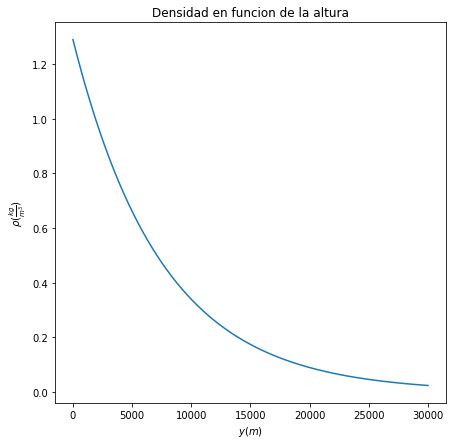

In [ ]:
y = np.linspace(0,30000,10000) # Se establece las alturas
rho_ = Rho(y) # Se halla la densidad para cada una
plt.figure(figsize=(7,7))
plt.title("Densidad en funcion de la altura")
plt.plot(y,rho_)  # Se grafica la densidad en funcion de la altura
plt.ylabel(r"$\rho(\frac{kg}{m^3})$")
plt.xlabel(r"$y(m)$")

Punto 2

### Usando la ecuacion

\begin{equation}
\frac{ \mathrm{d}^2 y }{\mathrm{d}t^2} = -g + k_0v^2e^{(\frac{-y}{\lambda})}
\end{equation}
### Remplazando
\begin{equation}
\frac{ \mathrm{d} y }{\mathrm{d}t} = v
\end{equation} 
Nos queda la ecuacion
\begin{equation}
\dot{v}= -g + k_0v^2e^{(\frac{-y}{\lambda})}
\end{equation}

In [ ]:
def acelerate(y,t,params):  # Funcion para encontrar la acelecion 
  g = params[0]  # Esta funcion se va a usar en odeint para resolver la ecuacion 
  lambda_ = params[1]
  A = params[2]
  delta = params[3]
  m = params[4]
  k_0 = 1.29*A*delta/(2*m)
  dydt = y[1]
  dvdt = -g + k_0*y[1]**2*np.exp(-y[0]/lambda_)
  return [dydt,dvdt]

In [ ]:
# Se establecen los valores iniciales en la funcion
g = 9.8
lambda_ = 7482.2
A = 0.3
delta = 0.5
m = 60
params = [g,lambda_,A,delta,m]
height = np.array([30000,40000,50000,60000,70000])
positions = {}
t = np.linspace(0.1,300,10000)
for i in height: # Para cada valor de la altura, se resuelve la EDO, y se guarda
                # En un diccionario
  init_values =[i,0]
  positions[str(i)] = odeint(acelerate,init_values,t,args = (params,))

Funcion para graficar

In [ ]:
def plotter(val):
  # Funcion utilizada para generar las graficas principales
  value = str(val)
  plt.figure(figsize=(10,10))
  # Graficar  la altura en funcion del tiempo con la altura inicial seleccionada
  plt.subplot(311)
  plt.title("Altura en funcion del tiempo",fontsize=15)
  plt.plot(t, positions[value][:,0])
  plt.xlabel("T",fontsize=12)
  plt.ylabel("Y",fontsize=12)
  # Graficar  la velocidad en funcion del tiempo con la altura inicial seleccionada
  plt.subplot(312)
  plt.title("velocidad en funcion del tiempo",fontsize=15)
  plt.plot(t, -positions[value][:,1])
  plt.xlabel("T",fontsize=12)
  plt.ylabel(r"$v$",fontsize=12)
  # Graficar  la velocidad en funcion de la posicion con la altura inicial seleccionada
  plt.subplot(313)
  plt.title("velocidad en funcion de la posicion",fontsize=15)
  plt.plot(positions[value][:,0], -positions[value][:,1])
  plt.xlabel("y",fontsize=12)
  plt.ylabel(r"$v$",fontsize=12)
  plt.tight_layout()

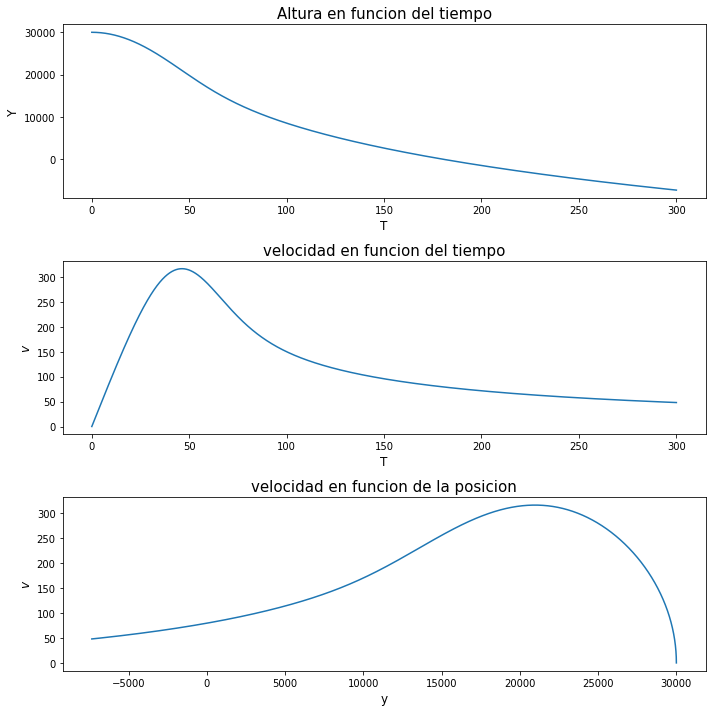

In [ ]:
plotter(30000)

### La velocidad maxima ocurre cuando la aceleracion sea 0, es decir
\begin{align}
0= -g + k_0v^2e^{(\frac{-y}{\lambda})} \\
\frac{g}{k_0} = v^2e^{(\frac{-y}{\lambda})} \\
v_{max} = \sqrt{\frac{g}{k_0}}e^{(\frac{y}{2\lambda})}
\end{align}


In [ ]:
# Despues de hacer la aceleracion 0, se halla una funcion para la velocidad maxima
# En funcion de la altura
def max_speed(y):
  k_0 = (1.29*A*delta/(2*m))
  return np.sqrt(g/k_0)*np.exp(y/(2*lambda_))

funcion para graficar la velocidad maxima segun la altura

(0.0, 70000.0)

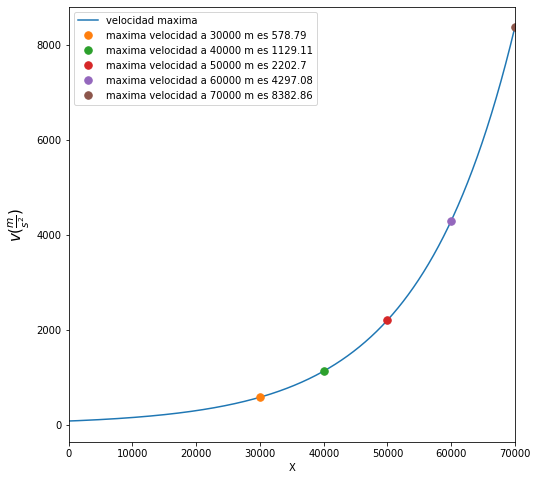

In [ ]:
max_speeds = max_speed(positions["70000"][:,0]) # Se realiza la funcion desde la
# Altura mas baja hasta la inicial
plt.figure(figsize=(8,8))
# Grafica para la velocidad maxima vs la altura
plt.plot(positions["70000"][:,0],max_speeds, label = "velocidad maxima")
plt.xlabel("y")
plt.ylabel(r"$v(\frac{m}{s^2})$", fontsize = 15)
for i in height:
  maax = max_speed(i)
  plt.plot(i,maax,".",
           label = "maxima velocidad a "+str(i)+" m es "+ str(maax.round(2)),
           markersize = 15)
plt.legend()
plt.xlim((0,max(positions["70000"][:,0])))